# Experimento de clusterização de ocorrências de Tangará

Experimento de clusterização de ocorrências geográficas de pássaros Tangará. Para isso usamos a base de dados 'base-dados-tangara.csv', com 4950 entradas. Começamos importando as bibliotecas necessárias, carregando o arquivo CSV de base de dados para o ambiente de execução caso estejamos executando no Google Colab e instalando a biblioteca minisom.

In [ ]:
import io
import numpy as np

from google.colab import files
#uploaded = files.upload()  # Inserir base-dados-tangara.csv

import numpy.random
import matplotlib.pyplot as plt

from geopy.distance import great_circle
from geopy.distance import geodesic    

!pip install minisom
from minisom import MiniSom    

np.random.seed(1)       # Para padronizar os resultados obtidos com random
sensors_range = [100, 250, 10000]      # Alcance máximo dos sensores que vão ser usados


Carregamos a base de dados de localizações geográficas de ocorrências de pássaros Tangará e organizamos os dados na matrix data.

In [ ]:
data_list = list()
with open( 'base-dados-tangara.csv', 'r' ) as f:
  for line in f.readlines():
    row = line.strip('\n').split(',')
    component_counter = 0
    for element in row:
      try:
        data_list.append(float(element))
      except ValueError:
        None
  
data = np.array(data_list)
data = data.reshape(-1, 2)
np.random.shuffle(data)
data = data.T

print(data)
print(data.shape)

[[-23.71519119 -23.71384028 -23.67508242 ... -23.72884086 -23.67432341
  -23.71645103]
 [-47.08780794 -46.94559856 -46.96173891 ... -47.11646518 -46.96107075
  -47.0914562 ]]
(2, 4953)


Exibimos os dados no mapa. A primeira linha dos dados se refere à latitude (interpretada como eixo y) e a segunda linha se refere à longitude (interpretada como eixo x).

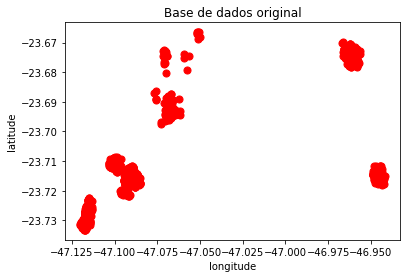

In [ ]:
# Generate some test data
x = data[1, :]
y = data[0, :]

plt.scatter(x, y, color='red', s=50);
plt.title("Base de dados original")
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.savefig("BaseDadosOriginal.png", dpi = 200)
plt.show()

Fazemos o experimento com o algoritmo KMeans com 8 centroides, exibimos o gráfico de clusters gerados e calculamos as distâncias mínima, máxima e média entre os pontos de ocorrência do Tangará e os centroides mais próximos. Também calculamos a eficácia de diferentes sensores se colocados nos centroides calculados quando consideramos os diferentes alcances.

[6 4 0 ... 2 0 1]
Average Distance = 181m
Minimum Distance = 2m
Maximum Distance = 1580m
Sensor efficiency (100m) = 32.3%
Sensor efficiency (250m) = 77.2%
Sensor efficiency (10000m) = 100.0%


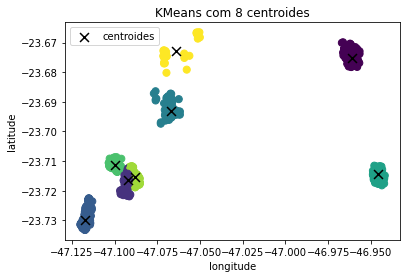

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=1)
kmeans.fit(data.T)
y_kmeans = kmeans.predict(data.T)
centers = kmeans.cluster_centers_
print(y_kmeans)

kmeans8Dists = []
for i in range(len(y)):
  kmeans8Dists.append(geodesic((y[i], x[i]), (centers[y_kmeans[i], 0], centers[y_kmeans[i], 1])).meters)
print("Average Distance = " + str(int(sum(kmeans8Dists)/len(kmeans8Dists))) + "m")
print("Minimum Distance = " + str(int(min(kmeans8Dists))) + "m")
print("Maximum Distance = " + str(int(max(kmeans8Dists))) + "m")
for sensor_range in sensors_range:
  print("Sensor efficiency (" + str(sensor_range) + "m) = " + '{:.1%}'.format(sum(i < sensor_range for i in kmeans8Dists)/len(kmeans8Dists)))

plt.scatter(x, y, c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=80, marker='x', alpha=1, label="centroides");
plt.legend()
plt.title("KMeans com 8 centroides")
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.savefig("KMeans8.png", dpi = 200)
plt.show()

Fazemos o experimento com o algoritmo KMeans com 16 centroides, exibimos o gráfico de clusters gerados e calculamos as distâncias mínima, máxima e média entre os pontos de ocorrência do Tangará e os centroides mais próximos. Também calculamos a eficácia de diferentes sensores se colocados nos centroides calculados quando consideramos os diferentes alcances.

[10  4  0 ...  2  9 14]
Average Distance = 132m
Minimum Distance = 1m
Maximum Distance = 1065m
Sensor efficiency (100m) = 41.6%
Sensor efficiency (250m) = 90.5%
Sensor efficiency (10000m) = 100.0%


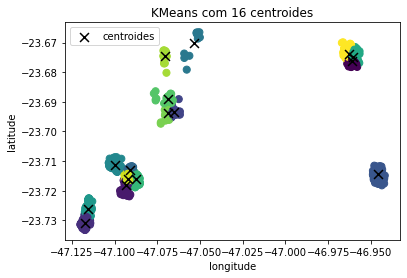

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=16, random_state=1)
kmeans.fit(data.T)
y_kmeans = kmeans.predict(data.T)
centers = kmeans.cluster_centers_
print(y_kmeans)

kmeans16Dists = []
for i in range(len(y)):
  kmeans16Dists.append(geodesic((y[i], x[i]), (centers[y_kmeans[i], 0], centers[y_kmeans[i], 1])).meters)
print("Average Distance = " + str(int(sum(kmeans16Dists)/len(kmeans16Dists))) + "m")
print("Minimum Distance = " + str(int(min(kmeans16Dists))) + "m")
print("Maximum Distance = " + str(int(max(kmeans16Dists))) + "m")
for sensor_range in sensors_range:
  print("Sensor efficiency (" + str(sensor_range) + "m) = " + '{:.1%}'.format(sum(i < sensor_range for i in kmeans16Dists)/len(kmeans16Dists)))

plt.scatter(x, y, c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=80, marker='x', alpha=1, label="centroides");
plt.legend()
plt.title("KMeans com 16 centroides")
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.savefig("KMeans16.png", dpi = 200)
plt.show()

Fazemos o experimento com o algoritmo KMeans com 32 centroides, exibimos o gráfico de clusters gerados e calculamos as distâncias mínima, máxima e média entre os pontos de ocorrência do Tangará e os centroides mais próximos. Também calculamos a eficácia de diferentes sensores se colocados nos centroides calculados quando consideramos os diferentes alcances.

[ 6 25 21 ... 12 24 28]
Average Distance = 81m
Minimum Distance = 1m
Maximum Distance = 621m
Sensor efficiency (100m) = 72.9%
Sensor efficiency (250m) = 98.6%
Sensor efficiency (10000m) = 100.0%


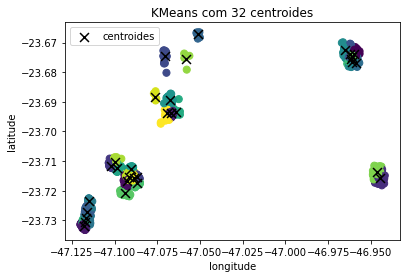

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=32, random_state=1)
kmeans.fit(data.T)
y_kmeans = kmeans.predict(data.T)
centers = kmeans.cluster_centers_
print(y_kmeans)

kmeans32Dists = []
for i in range(len(y)):
  kmeans32Dists.append(geodesic((y[i], x[i]), (centers[y_kmeans[i], 0], centers[y_kmeans[i], 1])).meters)
print("Average Distance = " + str(int(sum(kmeans32Dists)/len(kmeans32Dists))) + "m")
print("Minimum Distance = " + str(int(min(kmeans32Dists))) + "m")
print("Maximum Distance = " + str(int(max(kmeans32Dists))) + "m")
for sensor_range in sensors_range:
  print("Sensor efficiency (" + str(sensor_range) + "m) = " + '{:.1%}'.format(sum(i < sensor_range for i in kmeans32Dists)/len(kmeans32Dists)))

plt.scatter(x, y, c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=80, marker='x', alpha=1, label="centroides");
plt.legend()
plt.title("KMeans com 32 centroides")
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.savefig("KMeans32.png", dpi = 200)
plt.show()

Fazemos o experimento com o algoritmo Self Organizing Map com 8 centroides, exibimos o gráfico de clusters gerados e calculamos as distâncias mínima, máxima e média entre os pontos de ocorrência do Tangará e os centroides mais próximos. Também calculamos a eficácia de diferentes sensores se colocados nos centroides calculados quando consideramos os diferentes alcances.

 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 0.0022209856415078997
[5 0 1 ... 7 1 5]
(8, 1, 2)
Average Distance = 237m
Minimum Distance = 1m
Maximum Distance = 3098m
Sensor efficiency (100m) = 18.7%
Sensor efficiency (250m) = 61.9%
Sensor efficiency (10000m) = 100.0%


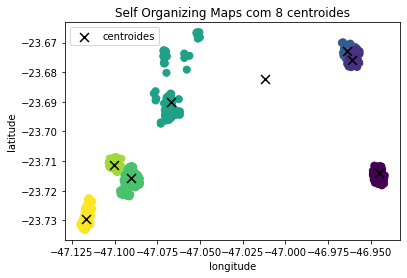

In [ ]:
som_shape = (8, 1)
som = MiniSom(som_shape[0], som_shape[1], 2, sigma=0.5, learning_rate=0.5, random_seed=1)
som.train_batch(data.T, 50000, verbose=True)

# cada neuronio representa um cluster
winner_coordinates = np.array([som.winner(x) for x in data.T]).T
# com np.ravel_multi_index convertemos as coordenadas bidimensionais para um index unidimensional
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
print(cluster_index)
som_weights = som.get_weights()
print(som_weights.shape)

som8Dists = []
for i in range(len(y)):
  som8Dists.append(geodesic((y[i], x[i]), (som_weights[cluster_index[i], 0, 0], som_weights[cluster_index[i], 0, 1])).meters)
print("Average Distance = " + str(int(sum(som8Dists)/len(som8Dists))) + "m")
print("Minimum Distance = " + str(int(min(som8Dists))) + "m")
print("Maximum Distance = " + str(int(max(som8Dists))) + "m")
for sensor_range in sensors_range:
  print("Sensor efficiency (" + str(sensor_range) + "m) = " + '{:.1%}'.format(sum(i < sensor_range for i in som8Dists)/len(som8Dists)))


plt.scatter(data[1, :], data[0, :], c=cluster_index, s=50, cmap='viridis')
plt.scatter(som_weights[:, :, 1], som_weights[:, :, 0], marker='x', s=80, linewidths=35, color='k', label='centroides')

plt.title("Self Organizing Maps com 8 centroides")
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.savefig("SOM8.png", dpi = 200)
plt.legend();
plt.show()

Fazemos o experimento com o algoritmo Self Organizing Map com 16 centroides, exibimos o gráfico de clusters gerados e calculamos as distâncias mínima, máxima e média entre os pontos de ocorrência do Tangará e os centroides mais próximos. Também calculamos a eficácia de diferentes sensores se colocados nos centroides calculados quando consideramos os diferentes alcances.

 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 0.0013822722572200776
[15  0  2 ...  9  2 14]
(16, 1, 2)
Average Distance = 146m
Minimum Distance = 2m
Maximum Distance = 1556m
Sensor efficiency (100m) = 43.3%
Sensor efficiency (250m) = 86.7%
Sensor efficiency (10000m) = 100.0%


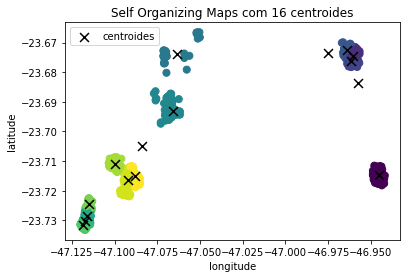

In [ ]:
som_shape = (16, 1)
som = MiniSom(som_shape[0], som_shape[1], 2, sigma=0.5, learning_rate=0.5, random_seed=1)
som.train_batch(data.T, 50000, verbose=True)

# cada neuronio representa um cluster
winner_coordinates = np.array([som.winner(x) for x in data.T]).T
# com np.ravel_multi_index convertemos as coordenadas bidimensionais para um index unidimensional
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
print(cluster_index)

som_weights = som.get_weights()
print(som_weights.shape)

som16Dists = []
for i in range(len(y)):
  som16Dists.append(geodesic((y[i], x[i]), (som_weights[cluster_index[i], 0, 0], som_weights[cluster_index[i], 0, 1])).meters)
print("Average Distance = " + str(int(sum(som16Dists)/len(som16Dists))) + "m")
print("Minimum Distance = " + str(int(min(som16Dists))) + "m")
print("Maximum Distance = " + str(int(max(som16Dists))) + "m")
for sensor_range in sensors_range:
  print("Sensor efficiency (" + str(sensor_range) + "m) = " + '{:.1%}'.format(sum(i < sensor_range for i in som16Dists)/len(som16Dists)))


plt.scatter(data[1, :], data[0, :], c=cluster_index, s=50, cmap='viridis')
plt.scatter(som_weights[:, :, 1], som_weights[:, :, 0], marker='x', s=80, linewidths=35, color='k', label='centroides')
plt.title("Self Organizing Maps com 16 centroides")
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.savefig("SOM16.png", dpi = 200)
plt.legend();
plt.show()

Fazemos o experimento com o algoritmo Self Organizing Map com 32 centroides, exibimos o gráfico de clusters gerados e calculamos as distâncias mínima, máxima e média entre os pontos de ocorrência do Tangará e os centroides mais próximos. Também calculamos a eficácia de diferentes sensores se colocados nos centroides calculados quando consideramos os diferentes alcances.

 [ 500000 / 500000 ] 100% - 0:00:00 left 
 quantization error: 0.0008852350414107313
[14  0  3 ... 22  4 16]
(32, 1, 2)
Average Distance = 94m
Minimum Distance = 1m
Maximum Distance = 1880m
Sensor efficiency (100m) = 69.4%
Sensor efficiency (250m) = 96.5%
Sensor efficiency (10000m) = 100.0%


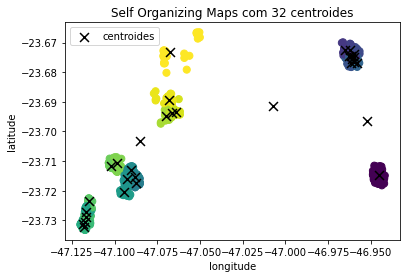

In [ ]:
som_shape = (32, 1)
som = MiniSom(som_shape[0], som_shape[1], 2, sigma=0.5, learning_rate=0.5, random_seed=1)
som.train_batch(data.T, 500000, verbose=True)

# cada neuronio representa um cluster
winner_coordinates = np.array([som.winner(x) for x in data.T]).T
# com np.ravel_multi_index convertemos as coordenadas bidimensionais para um index unidimensional
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
print(cluster_index)

som_weights = som.get_weights()
print(som_weights.shape)

som32Dists = []
for i in range(len(y)):
  som32Dists.append(geodesic((y[i], x[i]), (som_weights[cluster_index[i], 0, 0], som_weights[cluster_index[i], 0, 1])).meters)
print("Average Distance = " + str(int(sum(som32Dists)/len(som32Dists))) + "m")
print("Minimum Distance = " + str(int(min(som32Dists))) + "m")
print("Maximum Distance = " + str(int(max(som32Dists))) + "m")
for sensor_range in sensors_range:
  print("Sensor efficiency (" + str(sensor_range) + "m) = " + '{:.1%}'.format(sum(i < sensor_range for i in som32Dists)/len(som32Dists)))


plt.scatter(data[1, :], data[0, :], c=cluster_index, s=50, cmap='viridis')
plt.scatter(som_weights[:, :, 1], som_weights[:, :, 0], marker='x', s=80, linewidths=35, color='k', label='centroides')
plt.title("Self Organizing Maps com 32 centroides")
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.savefig("SOM32.png", dpi = 200)
plt.legend();
plt.show()